In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [12]:
test = pd.read_json('germeval-competition-test.jsonl', lines=True).set_index('id')
ANNOTATORS = ["A001", "A002", "A003", "A004", "A005", "A007", "A008", "A009", "A010", "A012"]

annotations = pd.DataFrame(index=test.index, columns=ANNOTATORS)

for idx, row in test.iterrows():
    for annotator in row['annotators']:
        annotations.loc[idx][annotator] = True

annotations

,A001,A002,A003,A004,A005,A007,A008,A009,A010,A012
id,,,,,,,,,,
f3b81af2f6852bf1b9896629525d2f41,1,1,1,1,1,1,1,1,1,1
cf8b8bac7165144bb62b399a98843366,1,1,1,1,1,1,1,1,1,1
0c45cdf4cca5eec566d6dd53653b532b,1,1,1,1,1,1,1,1,1,1
3a60877d2c04ba65f457f7cc3e003169,1,1,1,1,1,1,1,1,1,1
f389b63364d8da93860e3c7e6569bf5b,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2f7322c62b63ff74ec945bb38ed9f258,NaN,1,NaN,NaN,NaN,NaN,NaN,1,1,NaN
ec5fe35f542aac2f3155177dbf2731c2,NaN,1,NaN,NaN,NaN,NaN,NaN,1,1,NaN
6674986a02bab67b011df90cc7396a96,NaN,1,NaN,NaN,NaN,NaN,NaN,1,1,NaN


In [29]:
annotation_amounts = pd.DataFrame(0, index=range(1, 11), columns=['amount'])
for idx, row in annotations.iterrows():
    count = row.count()
    annotation_amounts.loc[count]['amount'] += 1
annotation_amounts

,amount
1,0
2,0
3,325
4,0
5,1609
6,0
7,2
8,0
9,0
10,50


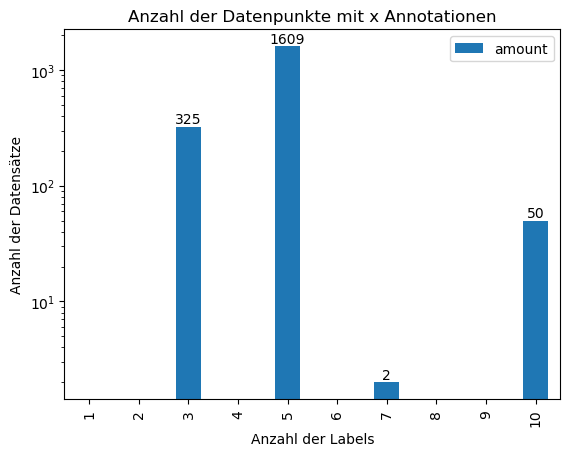

In [32]:
fig, ax = plt.subplots()
annotation_amounts.plot.bar(ax=ax)
ax.set_yscale("log")
ax.set_xlabel("Anzahl der Labels")
ax.set_ylabel("Anzahl der Datensätze")
ax.bar_label(ax.containers[0])
ax.set_title("Anzahl der Datenpunkte mit x Annotationen")
plt.show()